In [ ]:
pip install pymc3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.2/872.2 KB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529963 sha256=df21f8864afee31361d3114aa5ea625667dba96724048eb2bac425f50c89be30
  Stored in directory: /root/.cache/pip/wheels/0e/41/d2/82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

data = [0.01, 0.012, 0.014, 0.015, 0.016, 0.019, 0.016, 0.021, 0.020, 0.024]

df = pd.DataFrame(data, columns=['y'])
df['year'] = range(2010, 2020)

# fit ARIMA
model = sm.tsa.statespace.SARIMAX(df['y'], order=(1, 1, 1), seasonal_order=(0, 0, 0, 0), trend='c')
results = model.fit()

# 2020 and 2030
pred_2020 = results.forecast(steps=1)
pred_2030 = results.forecast(steps=11)

print("2020:", pred_2020.values[-1])
print("2030:", pred_2030.values[-1])


2020: 0.02296208109125898
2030: 0.03745128743710912


/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt

# Load the dataset
df = pd.DataFrame({
    'year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
    'probability': [0.01, 0.012, 0.014, 0.015, 0.016, 0.019, 0.016, 0.021, 0.020, 0.024]
})

# Define the prior parameters for the Beta distribution
alpha = 2
beta = 2

# Define the Bayesian model
with pm.Model() as model:
    # Define the prior distribution for the Beta distribution
    prior = pm.Beta('prior', alpha=alpha, beta=beta)

    # Define the likelihood function, modeling the sample data as a Bernoulli distribution
    likelihood = pm.Bernoulli('likelihood', p=prior, observed=df['probability'])

    # Use NUTS algorithm for posterior inference
    trace = pm.sample(2000, tune=1000, cores=1)

# Perform model prediction
with model:
    # Generate prediction for 2020
    x_future = np.zeros((1, 1))
    x_future[0, 0] = 0.0  # Fill in the predicted value for 2020

    # Sample from the posterior predictive distribution
    pp_samples = pm.sample_posterior_predictive(trace, samples=1000, var_names=['prior'], progressbar=False)

    # Compute the quantiles of the prediction
    quantiles = np.percentile(pp_samples['prior'], q=[2.5, 50, 97.5])
    median = quantiles[1]
    lower = quantiles[0]
    upper = quantiles[2]


/usr/local/lib/python3.8/dist-packages/deprecat/classic.py:215: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  return wrapped_(*args_, **kwargs_)


/usr/local/lib/python3.8/dist-packages/pymc3/sampling.py:1708: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(


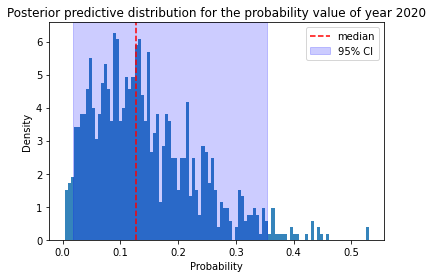

In [ ]:
import matplotlib.pyplot as plt

# Extract the posterior predictive samples for 'prior' variable
samples = pp_samples['prior']

# Plot the histogram of the samples
plt.hist(samples, bins=100, density=True, alpha=0.9)

# Plot the vertical line for the median of the predicted distribution
plt.axvline(quantiles[1], color='red', linestyle='--', label='median')

# Plot the shaded region for the 95% confidence interval of the predicted distribution
plt.axvspan(quantiles[0], quantiles[2], color='blue', alpha=0.2, label='95% CI')

# Add the legend and axis labels
plt.legend()
plt.xlabel('Probability')
plt.ylabel('Density')
plt.title('Posterior predictive distribution for the probability value of year 2020')

# Show the plot
plt.show()


In [ ]:
trace

<MultiTrace: 2 chains, 2000 iterations, 2 variables>

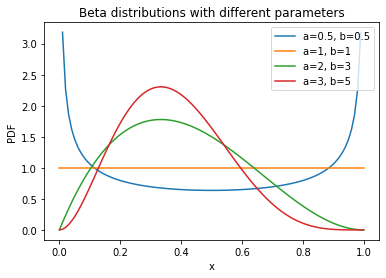

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define parameter values for the beta distribution
a_values = [0.5, 1, 2, 3]
b_values = [0.5, 1, 3, 5]

# Set the x-axis range
x = np.linspace(0, 1, 100)

# Plot the beta distributions
for a, b in zip(a_values, b_values):
    y = beta.pdf(x, a, b)
    plt.plot(x, y, label=f"a={a}, b={b}")

# Add plot labels and legend
plt.xlabel("x")
plt.ylabel("PDF")
plt.title("Beta distributions with different parameters")
plt.legend()

# Show the plot
plt.show()


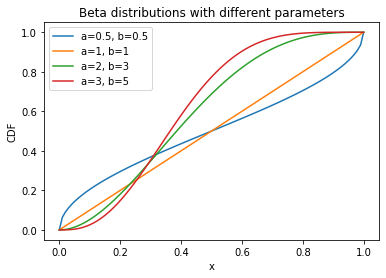

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta

# Define parameter values for the beta distribution
a_values = [0.5, 1, 2, 3]
b_values = [0.5, 1, 3, 5]

# Set the x-axis range
x = np.linspace(0, 1, 100)

# Plot the CDF of the beta distributions
for a, b in zip(a_values, b_values):
    y = beta.cdf(x, a, b)
    plt.plot(x, y, label=f"a={a}, b={b}")

# Add plot labels and legend
plt.xlabel("x")
plt.ylabel("CDF")
plt.title("Beta distributions with different parameters")
plt.legend()

# Show the plot
plt.show()


<ipython-input-57-2c4b078394ab>:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax1.stem(x, pmf)


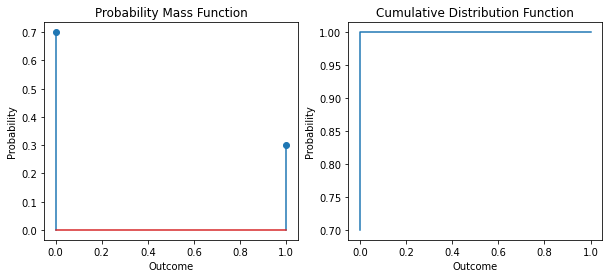

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Define the probability of success
p = 0.3

# Create a Bernoulli distribution object with p
dist = bernoulli(p)

# Set the range of possible outcomes
x = np.arange(2)

# Calculate the PMF and CDF for the Bernoulli distribution
pmf = dist.pmf(x)
cdf = dist.cdf(x)

# Plot the PMF and CDF
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.stem(x, pmf)
ax1.set_xlabel('Outcome')
ax1.set_ylabel('Probability')
ax1.set_title('Probability Mass Function')

ax2.step(x, cdf)
ax2.set_xlabel('Outcome')
ax2.set_ylabel('Probability')
ax2.set_title('Cumulative Distribution Function')

plt.show()
